In [15]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
import scipy.stats as stats

Populating the interactive namespace from numpy and matplotlib


In [16]:
# Initialize the x- and y-arrays that we will use to plot
x_axis = []
mean = []
variance = []
skew_list = []
kurt_list = []

# generate gaussian pdf of x
mu = 2.0
variance = 2.0
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
#plot(x, stats.norm.pdf(x, mu, sigma))
#show()

In [59]:
# proposal
def q(x):
    # add a random number drawn from a gaussian whose mean is the current position and the standard deviation is 1
    # randn() draws from a normalized gausian whose mean is 0 and stdev is 1
    sigma = 0.3     # standard deviation, variance = sigma^2
    return x + sigma*randn()

In [60]:
# density function f(x)
def f(x):
    mu = 2
    sigma = math.sqrt(2)
    return 1.0/(sigma*math.sqrt(2.0*pi)) * exp(-0.5 * ((x-mu)/sigma)**2)

In [64]:
xs = [0]    # initialize MCMC algorithm with arbitrary starting value of x
for i in range(10000):
    x = xs[-1]
    x_new = q(x)
    accept_ratio = f(x_new)/f(x)
    if rand() < accept_ratio:
        xs.append(x_new)
    else:
        xs.append(x)

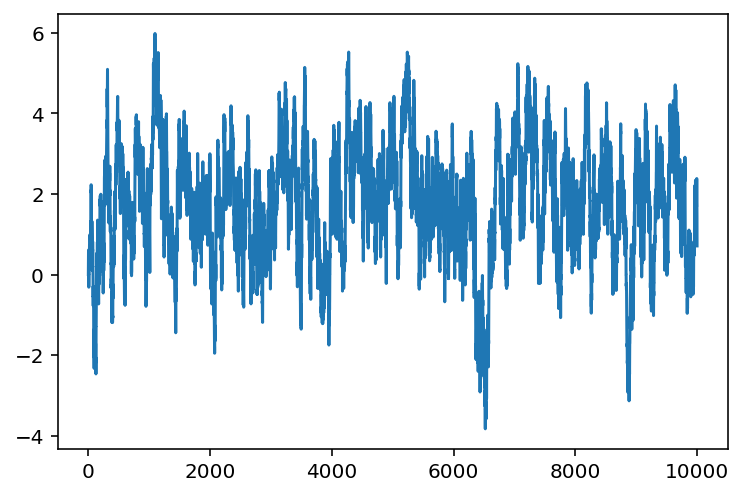

In [65]:
plot(xs)

c:\software\python\python3.7.4\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


(array([0.00264979, 0.00428043, 0.00876468, 0.0150834 , 0.02221745,
        0.02751702, 0.05381106, 0.11251404, 0.17203234, 0.22747404,
        0.24643021, 0.27618936, 0.26946297, 0.22400893, 0.15491063,
        0.11006808, 0.06461404, 0.02751702, 0.01671404, 0.00224213]),
 array([-3.82954974, -3.33899336, -2.84843698, -2.35788059, -1.86732421,
        -1.37676783, -0.88621144, -0.39565506,  0.09490132,  0.58545771,
         1.07601409,  1.56657047,  2.05712686,  2.54768324,  3.03823962,
         3.52879601,  4.01935239,  4.50990877,  5.00046516,  5.49102154,
         5.98157792]),
 <a list of 20 Patch objects>)

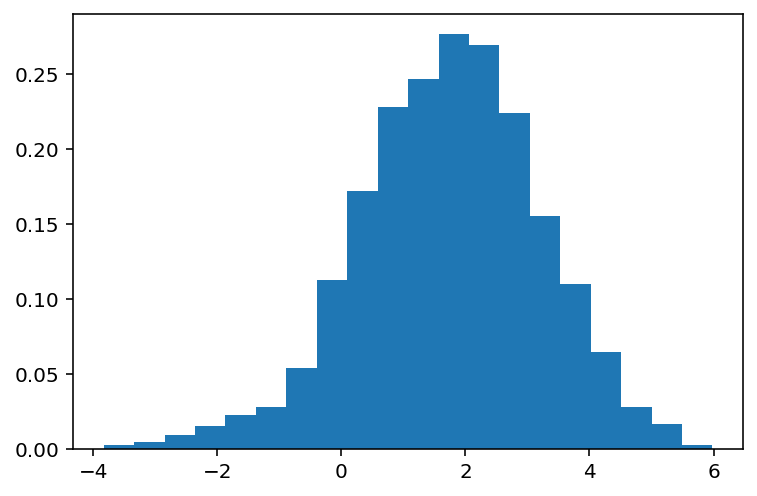

In [66]:
hist(xs, normed=True, bins=20)

With a low variance for q(x'|x), the distribution becomes skewed left and more concentrated near the mean.
With a high variance for q(x'|x), the distribution becomes more "tailed".